* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
======================
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# ^Wait, why does it say that? Why do I need to change them? 
# Oh god, what is going to happen?!
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
#Lets grab the csvs and read them
df_mouse = pd.read_csv("data/mouse_drug_data.csv")
df_clinic = pd.read_csv("data/clinicaltrial_data.csv")

In [3]:
#So they both share mouse ID column. Merging them based on that then.
df = pd.merge(df_mouse, df_clinic, on="Mouse ID")

## Tumor Response to Treatment

Just a reminder for myself:
* A scatter plot that shows how the tumor volume changes over time for each drug with errorbars
* Include beauty things like Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
Everything for this graph will have the previx of tumor_

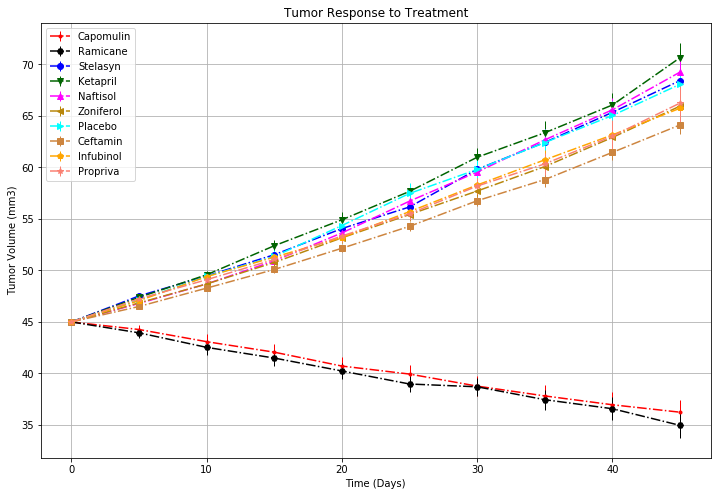

In [4]:
tumor_df = df[["Timepoint", "Drug","Tumor Volume (mm3)"]]

#timepoints are 0,5,10,15,20,25,30,35,40,45
tumor_x_axis = tumor_df["Timepoint"].value_counts().index

#========
#All segments of the homework is just this code below but rehashed. Yeah I could refactor it into a function and poop out a subplot but that's a TODO that I'm never going to get to. 
#========
drug_names = list(tumor_df["Drug"].value_counts().index)
drug_colors = ['red','black','blue','darkgreen','magenta','darkgoldenrod','aqua','peru','orange','salmon']
drug_formats = ['.-','H-','o-','v-','^-','<-','>-','s-','p-','*-']

#Figuresize needs to be here, or above. Plot configurations need to be done before plotting or show()ing or savfig()ing
plt.figure(figsize=(12,8))

#This is the loop we use to plot everything. 
#We get the information we need, (line 9 above)
#we isolate the column we need so we can get a series that's easily plotable (line 25 and 26 below)
#and we plot that BAMF in line 28. 
#Rinse and repeat for every drug name before slapping on some beauty stuff in lines 33-37 (hope you got line numbers enabled)
#Oh there's some funky interaction between savefig and show. When you do a show(), it "closes" the current figure so save won't save anything (it'll just be a blank image)
#Again, all of these things are the same code so later plots will have far less commenting.
for x in range(len(drug_names)):
    #We're just going to plot them all via a loop.
    
    #getting all the temporary variables for our current loop
    drug = drug_names[x]
    drug_color = drug_colors[x]
    drug_format = drug_formats[x]
    
    #tumor_df has everything we need but it's a giant list of all the drugs combined so we have to get the one we need. Maybe it would be faster to go by index or something instead of .loc but I'm not going that far for this assignment.
    drug_selected = tumor_df.loc[tumor_df["Drug"] == drug , : ]
    
    #Now that we have a list of all the tumor volumes for the drug that we want
    #we need to group by and MEAN them
    drug_mean = drug_selected.groupby("Timepoint").mean()["Tumor Volume (mm3)"]
    
    #Same concept again but we're SEM-ing them instead. Maybe we don't need the drop here since we're
    #doing [Tumor Volume] which would return one column anyway... maybe it had something to do with multi index?
    #I'm too lazy to change it now in case it breaks something and it's working fine for now.
    drug_sem = drug_selected.groupby("Timepoint").sem().drop(columns=["Drug"], axis=1)["Tumor Volume (mm3)"]
    
    #Ok lets plot it. We 
    plt.errorbar(tumor_x_axis, drug_mean, yerr=drug_sem, color=drug_color, fmt=drug_format, elinewidth=1, linestyle="-.", label = drug)


#Lets label a bunch of things, add legend, the works. Chrome rims are a scam, stainless steel rims already have a chrome finish that provides anti-rust. Are chrome rims even chrome or just plated and remarketed?
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.grid()


#And we finally save it. I believe that if you wanted to do a show(), it would have to be after this one. Doing a show() before savefig creates a new blank. 
plt.savefig("Tumor.png", dpi=100)

plt.show()

## Metastatic Response to Treatment

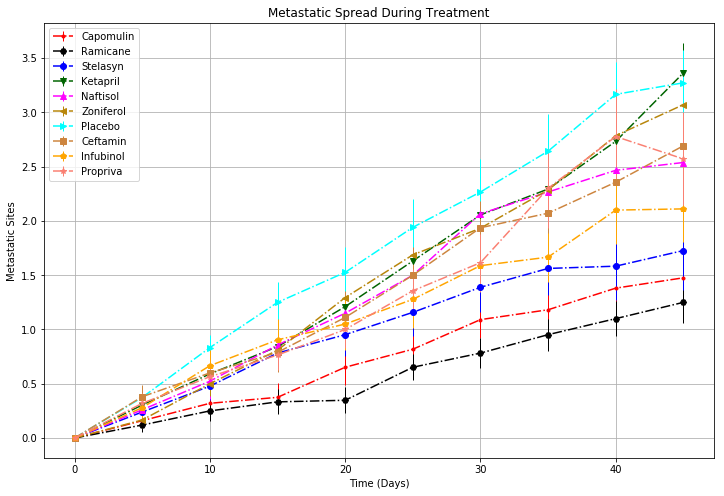

In [5]:
#I'm adding these comments in a few hours after the code was written. It's literally 95% copypasta from the code above. Something changed here, I just can't remember what. Oh.. I think it's just Metastatic sites as opposed to tumor volume.

meta_df = df[["Timepoint", "Drug","Metastatic Sites"]]

#timepoints are 0,5,10,15,20,25,30,35,40,45
meta_x_axis = meta_df["Timepoint"].value_counts().index

drug_names = list(meta_df["Drug"].value_counts().index)
drug_colors = ['red','black','blue','darkgreen','magenta','darkgoldenrod','aqua','peru','orange','salmon']
drug_formats = ['.-','H-','o-','v-','^-','<-','>-','s-','p-','*-']

plt.figure(figsize=(12,8))
for x in range(len(drug_names)):
    #We're just going to plot them all via a loop.
    drug = drug_names[x]
    drug_color = drug_colors[x]
    drug_format = drug_formats[x]
    drug_selected = meta_df.loc[meta_df["Drug"] == drug , : ]
    drug_mean = drug_selected.groupby("Timepoint").mean()["Metastatic Sites"]
    drug_sem = drug_selected.groupby("Timepoint").sem().drop(columns=["Drug"], axis=1)["Metastatic Sites"]
    plt.errorbar(meta_x_axis, drug_mean, yerr=drug_sem, color=drug_color, fmt=drug_format, elinewidth=1, linestyle="-.", label = drug)



plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="upper left")
plt.grid()


plt.savefig("Metastasis.png", dpi=100)

plt.show()

## Survival Rates

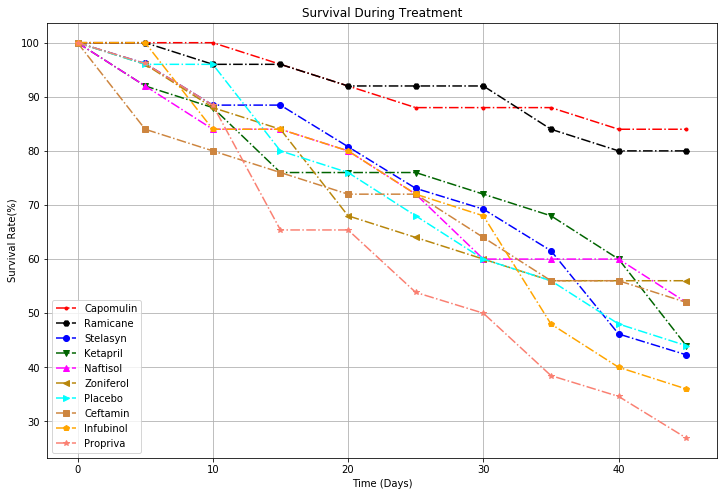

In [6]:
#Same thing but a bit different because instead of doing a MEAN of all the data we're interested in, we're doing a count() of Mouse ID instead a MEAN of metastatic sites or tumor size.

mouse_df = df[["Timepoint", "Drug","Mouse ID"]]

mouse_x_axis = mouse_df["Timepoint"].value_counts().index

drug_names = list(mouse_df["Drug"].value_counts().index)
drug_colors = ['red','black','blue','darkgreen','magenta','darkgoldenrod','aqua','peru','orange','salmon']
drug_formats = ['.-','H-','o-','v-','^-','<-','>-','s-','p-','*-']

plt.figure(figsize=(12,8))
for x in range(len(drug_names)):
    drug = drug_names[x]
    drug_color = drug_colors[x]
    drug_format = drug_formats[x]
    drug_selected = mouse_df.loc[mouse_df["Drug"] == drug , : ]
    
    initial_mice_count = drug_selected.groupby("Timepoint").count()["Mouse ID"][0]
    
    #Dividing that by 100 gives us a decimal that effectively does the same thing as multiplying
    #the entire thing by 100 aka going from decimal to x%
    drug_mice_count = drug_selected.groupby("Timepoint").count()["Mouse ID"] / (initial_mice_count/100)
    
    plt.errorbar(mouse_x_axis, drug_mice_count, color=drug_color, fmt=drug_format, elinewidth=1, linestyle="-.", label = drug)



plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.legend(loc="lower left")
plt.grid()


plt.savefig("mouse.png", dpi=100)

plt.show()

## Summary Bar Graph

In [7]:



# x_axis = np.arange(len(some_df))
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, some_df["col with the names"], rotation="vertical")

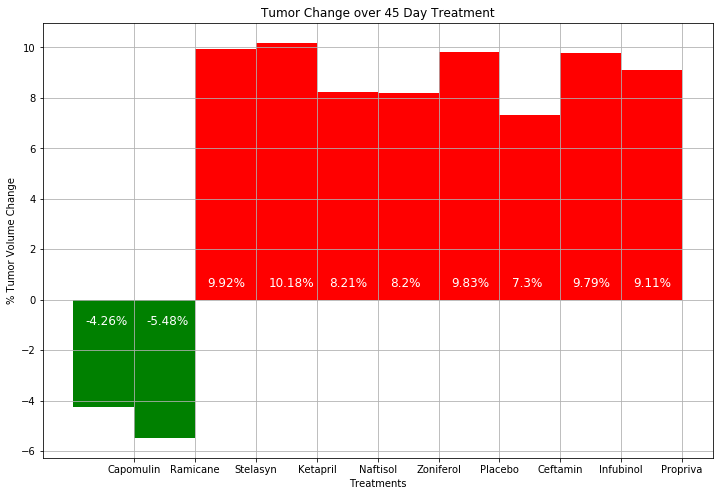

In [8]:
summary_df = df[["Timepoint", "Drug","Tumor Volume (mm3)"]]

drug_names = list(summary_df["Drug"].value_counts().index)

plt.figure(figsize=(12,8))

tumor_volume_change = []
#The loop here this time is really just to find tumor volume change by drug. I don't know if this scaffolding is the best idea but hey, it works. 
for x in range(len(drug_names)):
    drug = drug_names[x]
    drug_color = drug_colors[x]
    drug_format = drug_formats[x]
    
    drug_selected = summary_df.loc[tumor_df["Drug"] == drug , : ]
    drug_mean = drug_selected.groupby("Timepoint").mean()["Tumor Volume (mm3)"]
    
    initial_tumor_size = drug_mean[0]
    final_tumor_size = drug_mean[len(drug_mean)]
    tumor_change = ((final_tumor_size / initial_tumor_size) * 100)-100
    tumor_volume_change.append(tumor_change)
    

#Making X axis stuff
summary_x_axis = np.arange(len(summary_df["Drug"].value_counts()))
tick_locations = [value+1 for value in summary_x_axis]
plt.xticks(tick_locations, summary_df["Drug"].value_counts().index, rotation="horizontal")

#Drawing Bars
# We would normally just do this code below to plot it all at once.
# plt.bar(summary_x_axis[0], tumor_volume_change[0], color='r', alpha=1.0, align="edge", width=1)
#But it is not possible because we need to color them based on the bar's value. And there is no built in way to do that. Except by making fake bars and overlaying them, some crazy syntax hack, or some other unconventional stack overflow suggestion. I'm just going to take the long, but simple way of drawing the bars individually with the color based on the value.

for i in range(len(summary_x_axis)):
    if tumor_volume_change[i] > 0:
        plt.bar(summary_x_axis[i], tumor_volume_change[i], color='r', alpha=1.0, align="edge", width=1)
    else:
        plt.bar(summary_x_axis[i], tumor_volume_change[i], color='g', alpha=1.0, align="edge", width=1)

#Writting Text. The percent stuff near the horizon.
for i, v in enumerate(tumor_volume_change):
    
    text = round(v,2)
    if v > 0:
        plt.text(tick_locations[i]-0.8, 0.5, str(text)+"%", color="white", fontsize=12)
    else:
        plt.text(tick_locations[i]-0.8, -1, str(text)+"%", color="white", fontsize=12)

plt.title("Tumor Change over 45 Day Treatment")
plt.xlabel("Treatments")
plt.ylabel("% Tumor Volume Change")

plt.grid()

plt.savefig("Summary.png", dpi=100)
plt.show()